## Table of Content
* [Make RBC Model](#chapter1)
    * [Model Equations](#section_1_1)
    * [Find Steady State, Solve the Model](#section_1_2)
* [Get Italy data](#chapter2)

In [9]:
%matplotlib inline
import gEcon as ge
import gEcon.plotting as gp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import arviz as az
import os

import sys
sys.path.append('..')
from TimeSeriesTools.stats import ADF_test_summary
from TimeSeriesTools.transformers import DetrendTransformer, LogTransformer

config = {
    'figure.figsize':(14,4),
    'figure.dpi':144,
    'figure.facecolor':'white',
    'axes.grid':True,
    'grid.linestyle':'--',
    'grid.linewidth':0.5,
    'axes.spines.top':False,
    'axes.spines.bottom':False,
    'axes.spines.left':False,
    'axes.spines.right':False
}

plt.rcParams.update(config)

ModuleNotFoundError: No module named 'TimeSeriesTools'

## Make RBC Model <a class="anchor" id="chapter1"></a>

In [3]:
rbc = ge.gEconModel('GCN Files/RBC_complete.gcn')

FileNotFoundError: [Errno 2] No such file or directory: 'GCN Files/RBC_complete.gcn'

### Model Equations  <a class="anchor" id="section_1_1"></a>

In [4]:
for equation in rbc.system_equations:
    display(equation)

NameError: name 'rbc' is not defined

### Find Steady State, Solve the Model <a class="anchor" id="section_1_2"></a>

In [5]:
rbc.steady_state()
rbc.solve_model()

NameError: name 'rbc' is not defined

In [6]:
rbc.print_steady_state()

NameError: name 'rbc' is not defined

## Get Italy data <a class="anchor" id="chapter2"></a>

We want series for consumption, investment, labor, GDP, interest rate, and wages

In [14]:
#missin average hourly wage

data = pd.read_csv("all_rbc_data.csv")
data
data["TIME"]

,TIME,gdp,invest,importx,export,int_r,consump,year,h_work
0,1996-04-01,383862.9,75221.8,66564.3,82750.1,9.103333,293201.6,1996,2.067502e+06
1,1996-01-01,370716.6,70779.9,69813.9,78943.9,9.950000,289459.0,1996,2.067502e+06
2,1996-10-01,390420.0,73909.5,68544.2,81280.9,7.560000,295866.3,1996,2.067502e+06
3,1996-07-01,373369.1,68346.3,62623.4,79576.1,8.666667,292497.8,1996,2.067502e+06
4,1997-01-01,367123.9,69276.8,69187.0,77467.6,7.340000,291904.0,1997,2.070795e+06
...,...,...,...,...,...,...,...,...,...
99,2020-10-01,412046.3,79664.0,118103.9,131282.1,-0.522700,320721.9,2020,1.971261e+06
100,2021-01-01,395498.3,79308.9,117286.3,122612.7,-0.542467,309563.0,2021,3.419453e+06
101,2021-04-01,421027.3,86587.9,123296.3,136039.5,-0.540400,321823.8,2021,3.419453e+06
102,2021-07-01,427204.6,80142.2,122932.1,135554.5,-0.545800,336950.0,2021,3.419453e+06


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TIME     104 non-null    object 
 1   gdp      104 non-null    float64
 2   invest   104 non-null    float64
 3   importx  104 non-null    float64
 4   export   104 non-null    float64
 5   int_r    104 non-null    float64
 6   consump  104 non-null    float64
 7   year     104 non-null    int64  
 8   h_work   104 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 7.4+ KB


In [20]:
import datetime as dt

In [22]:
data["TIME"] = data.TIME.apply(lambda x: dt.datetime.strptime(str(x), "%Y-%m-%d"))

In [24]:
data.set_index("TIME", drop=True, inplace=True)

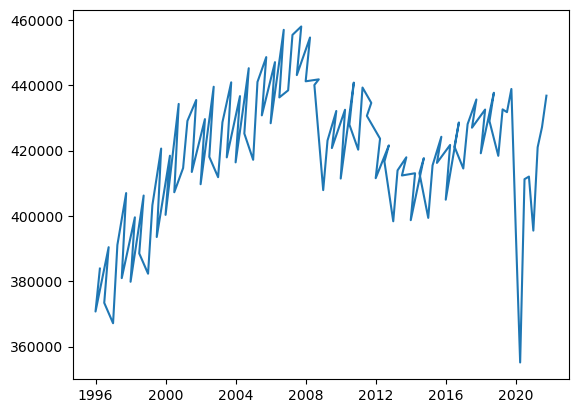

In [27]:
plt.plot(data.gdp)

<AxesSubplot: >

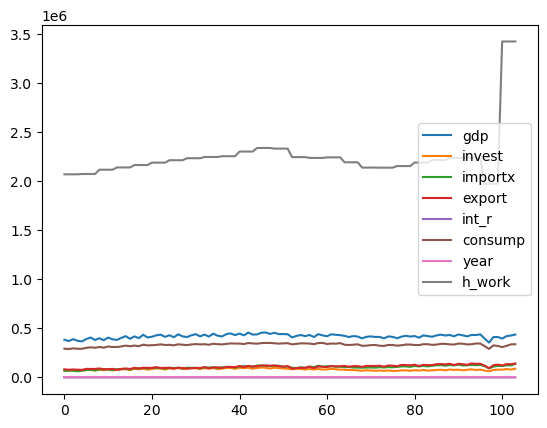

In [15]:
data.